<a href="https://colab.research.google.com/github/JasminPradhan/ML-project-1/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [6]:

DATADIR="/content/drive/MyDrive/data/tumor_dataset/"

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS=3
EPOCHS=42
path=os.path.join(DATADIR,"Train")
print(path)

/content/drive/MyDrive/data/tumor_dataset/Train


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1050 files belonging to 3 classes.


In [9]:
class_names = train_ds.class_names
class_names

['BENIGN', 'MALIGNANT', 'NORMAL']

In [10]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 200, 200, 3)
[0 2 0 0 1 0 2 1 2 1 0 2 1 1 1 2 0 2 0 1 0 1 2 2 0 1 1 0 1 1 2 2]


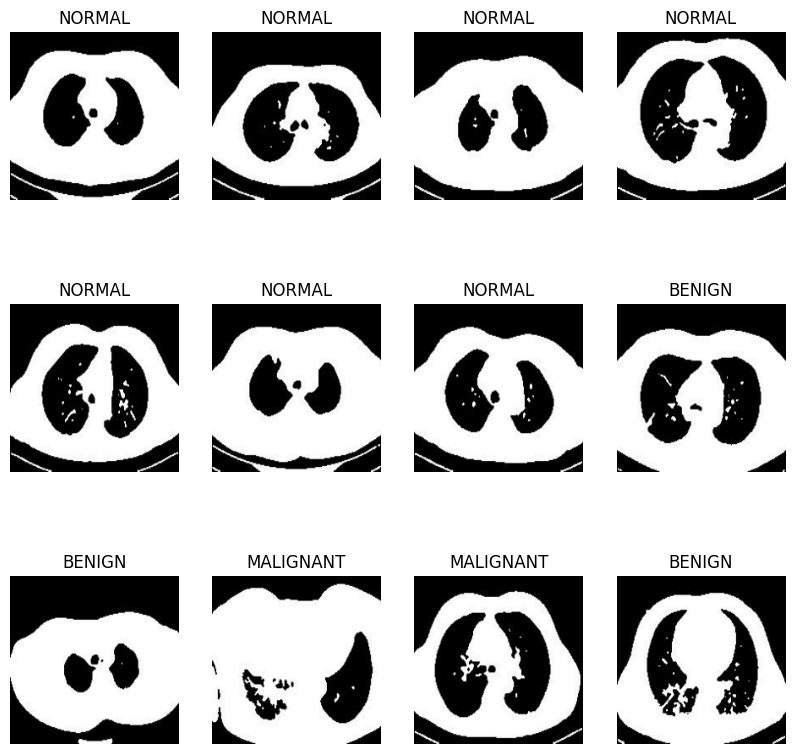

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


In [12]:
test_path=os.path.join(DATADIR,'Test')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 144 files belonging to 3 classes.


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.85),
])

In [24]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
print(input_shape)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

model.build(input_shape=input_shape)

(32, 200, 200, 3)


model.summary()

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 200, 200, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 100, 100, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 100, 100, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 50, 50, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 50, 50, 32)         

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
pd= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=42,
)

Epoch 1/42
33/33 [==============================] - 10s 217ms/step - loss: 1.0979 - accuracy: 0.3733
Epoch 2/42
33/33 [==============================] - 9s 250ms/step - loss: 1.0405 - accuracy: 0.4476
Epoch 3/42
33/33 [==============================] - 9s 273ms/step - loss: 0.9854 - accuracy: 0.5000
Epoch 4/42
33/33 [==============================] - 8s 226ms/step - loss: 0.9606 - accuracy: 0.5038
Epoch 5/42
33/33 [==============================] - 7s 219ms/step - loss: 0.9568 - accuracy: 0.5067
Epoch 6/42
33/33 [==============================] - 9s 272ms/step - loss: 0.9517 - accuracy: 0.5124
Epoch 7/42
33/33 [==============================] - 8s 232ms/step - loss: 0.9328 - accuracy: 0.5305
Epoch 8/42
33/33 [==============================] - 8s 223ms/step - loss: 0.9275 - accuracy: 0.5152
Epoch 9/42
33/33 [==============================] - 8s 241ms/step - loss: 0.9229 - accuracy: 0.5400
Epoch 10/42
33/33 [==============================] - 9s 275ms/step - loss: 0.9129 - accuracy: 0.534

In [29]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 0s 13ms/step - loss: 1.8146 - accuracy: 0.7083


In [30]:
scores

[1.8145910501480103, 0.7083333134651184]